# Correlations

In [2]:
#import libriaries
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import datetime
import plotly.express as px
import sqlite3
import os
import sqlite3

#Destination folder
os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

# Create your connection.
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

# SP500 correlations

In [11]:
#Get SQLLite select statement SP500 index and indicators
df = pd.read_sql_query("""select sp."Date", g."Index" as Gold, c19."Index" Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, ac."Index" as Arch_Coal, p."Index" as Platinum, ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, sp."Index" as SP500
 from SP500 as sp
  LEFT OUTER JOIN Covid19 as c19 ON sp.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON sp.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON sp.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON sp.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON sp.Date=s.Date
  LEFT OUTER JOIN Arch_Coal as ac ON sp.Date=ac.Date
  LEFT OUTER JOIN Platinum as p ON sp.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON sp.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON sp.Date=ip.Date
Where sp."Index" IS NOT NULL
""", conn)
df.head()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Arch_Coal,Platinum,Natural_Gas,Industrial_Production,SP500
0,2010-01-04 00:00:00,1121.50,NaN,81.52,3.4060,17.17,NaN,1523.9,6.09,NaN,1132.99
1,2010-01-05 00:00:00,1123.25,NaN,81.74,NaN,17.57,NaN,1537.8,6.19,NaN,1136.52
2,2010-01-06 00:00:00,1130.00,NaN,83.12,3.4945,17.89,NaN,1558.4,6.47,NaN,1137.14
3,2010-01-07 00:00:00,1130.25,NaN,82.60,3.4270,18.09,NaN,1559.4,7.51,NaN,1141.69
4,2010-01-08 00:00:00,1126.75,NaN,82.74,3.4005,18.12,NaN,1570.6,6.56,NaN,1144.98


,Gold,Covid19,Crude_Oil,Copper,Silver,Arch_Coal,Platinum,Natural_Gas,Industrial_Production,SP500
Gold,1.000000,0.560511,0.167767,0.316219,0.656284,-0.726963,0.479235,-0.047854,-0.698907,-0.637068
Covid19,0.560511,1.000000,-0.613917,-0.535411,-0.235873,-0.806061,-0.409167,-0.714001,0.036079,0.015182
Crude_Oil,0.167767,-0.613917,1.000000,0.977881,0.815322,0.372463,0.910042,0.887089,-0.794755,-0.666058
Copper,0.316219,-0.535411,0.977881,1.000000,0.894049,0.225033,0.954612,0.851351,-0.866065,-0.743725
Silver,0.656284,-0.235873,0.815322,0.894049,1.000000,-0.144374,0.948207,0.643694,-0.931533,-0.795054
Arch_Coal,-0.726963,-0.806061,0.372463,0.225033,-0.144374,1.000000,0.027957,0.423496,0.355355,0.253993
Platinum,0.479235,-0.409167,0.910042,0.954612,0.948207,0.027957,1.000000,0.831885,-0.968000,-0.870278
Natural_Gas,-0.047854,-0.714001,0.887089,0.851351,0.643694,0.423496,0.831885,1.000000,-0.759741,-0.645314
Industrial_Production,-0.698907,0.036079,-0.794755,-0.866065,-0.931533,0.355355,-0.968000,-0.759741,1.000000,0.970518
SP500,-0.637068,0.015182,-0.666058,-0.743725,-0.795054,0.253993,-0.870278,-0.645314,0.970518,1.000000


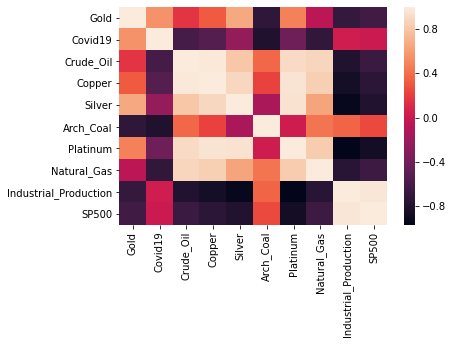

In [48]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df1=df.corr()
df1

# Boening correlations

In [59]:
#Get SQLLite select statement Boening stock prices and indicators
df2 = pd.read_sql_query("""select bo."Date", g."Index" as Gold, c19."Index" Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, ac."Index" as Arch_Coal, p."Index" as Platinum, ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, bo."Index" as Boening
 from Boening as bo
  LEFT OUTER JOIN Covid19 as c19 ON bo.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON bo.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON bo.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON bo.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON bo.Date=s.Date
  LEFT OUTER JOIN Arch_Coal as ac ON bo.Date=ac.Date
  LEFT OUTER JOIN Platinum as p ON bo.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON bo.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON bo.Date=ip.Date
Where bo."Index" IS NOT NULL
""", conn)

df2.tail()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Arch_Coal,Platinum,Natural_Gas,Industrial_Production,Boening
2590,2020-04-20 00:00:00,1686.20,2355774.0,NaN,NaN,15.150,28.85,NaN,NaN,NaN,143.61
2591,2020-04-21 00:00:00,1682.05,2433048.0,11.258,NaN,14.970,28.09,NaN,NaN,NaN,136.33
2592,2020-04-22 00:00:00,1710.55,2520435.0,NaN,NaN,14.910,NaN,NaN,NaN,NaN,134.97
2593,2020-04-23 00:00:00,1736.25,2588064.0,NaN,NaN,15.305,NaN,NaN,NaN,NaN,137.74
2594,2020-04-24 00:00:00,1715.90,2668137.0,NaN,NaN,15.315,NaN,NaN,NaN,NaN,128.98


,Gold,Covid19,Crude_Oil,Copper,Silver,Arch_Coal,Platinum,Natural_Gas,Industrial_Production,Boening
Gold,1.000000,0.710201,0.435017,0.524072,0.775484,-0.504237,0.445639,-0.102534,-0.183545,-0.195172
Covid19,0.710201,1.000000,-0.732945,-0.609019,-0.479094,-0.644785,-0.532026,-0.623689,NaN,-0.668084
Crude_Oil,0.435017,-0.732945,1.000000,0.809973,0.684610,0.750671,0.817824,0.580402,-0.399613,-0.461425
Copper,0.524072,-0.609019,0.809973,1.000000,0.806105,0.554824,0.830053,0.509682,-0.522959,-0.411855
Silver,0.775484,-0.479094,0.684610,0.806105,1.000000,-0.253981,0.801819,0.259655,-0.541172,-0.562794
Arch_Coal,-0.504237,-0.644785,0.750671,0.554824,-0.253981,1.000000,-0.010817,0.408143,0.654786,0.599881
Platinum,0.445639,-0.532026,0.817824,0.830053,0.801819,-0.010817,1.000000,0.585795,-0.783788,-0.779538
Natural_Gas,-0.102534,-0.623689,0.580402,0.509682,0.259655,0.408143,0.585795,1.000000,-0.499347,-0.382817
Industrial_Production,-0.183545,NaN,-0.399613,-0.522959,-0.541172,0.654786,-0.783788,-0.499347,1.000000,0.846942
Boening,-0.195172,-0.668084,-0.461425,-0.411855,-0.562794,0.599881,-0.779538,-0.382817,0.846942,1.000000


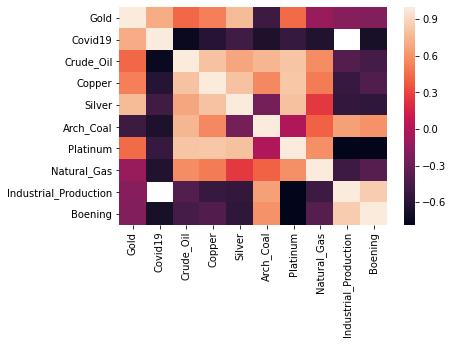

In [58]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df2.corr()

# Exxon mobil correlations

In [65]:
#Get SQLLite select statement Exxon_mobil stock prices and indicators
df = pd.read_sql_query("""select em."Date", g."Index" as Gold, c19."Index" as Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, ac."Index" as Arch_Coal, p."Index" as Platinum, ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, em."Index" as Exxon_mobil
 from Exxon_mobil as em
  LEFT OUTER JOIN Covid19 as c19 ON em.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON em.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON em.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON em.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON em.Date=s.Date
  LEFT OUTER JOIN Arch_Coal as ac ON em.Date=ac.Date
  LEFT OUTER JOIN Platinum as p ON em.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON em.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON em.Date=ip.Date
Where em."Index" IS NOT NULL
""", conn)
df.tail()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Arch_Coal,Platinum,Natural_Gas,Industrial_Production,Exxon_mobil
2590,2020-04-20 00:00:00,1686.20,2355774.0,NaN,NaN,15.150,28.85,NaN,NaN,NaN,41.18
2591,2020-04-21 00:00:00,1682.05,2433048.0,11.258,NaN,14.970,28.09,NaN,NaN,NaN,40.96
2592,2020-04-22 00:00:00,1710.55,2520435.0,NaN,NaN,14.910,NaN,NaN,NaN,NaN,42.13
2593,2020-04-23 00:00:00,1736.25,2588064.0,NaN,NaN,15.305,NaN,NaN,NaN,NaN,43.45
2594,2020-04-24 00:00:00,1715.90,2668137.0,NaN,NaN,15.315,NaN,NaN,NaN,NaN,43.73


,Gold,Covid19,Crude_Oil,Copper,Silver,Arch_Coal,Platinum,Natural_Gas,Industrial_Production,Exxon_mobil
Gold,1.000000,0.710201,0.435017,0.524072,0.775484,-0.504237,0.445639,-0.102534,-0.183545,-0.055359
Covid19,0.710201,1.000000,-0.732945,-0.609019,-0.479094,-0.644785,-0.532026,-0.623689,NaN,-0.528797
Crude_Oil,0.435017,-0.732945,1.000000,0.809973,0.684610,0.750671,0.817824,0.580402,-0.399613,0.378172
Copper,0.524072,-0.609019,0.809973,1.000000,0.806105,0.554824,0.830053,0.509682,-0.522959,0.083146
Silver,0.775484,-0.479094,0.684610,0.806105,1.000000,-0.253981,0.801819,0.259655,-0.541172,0.151568
Arch_Coal,-0.504237,-0.644785,0.750671,0.554824,-0.253981,1.000000,-0.010817,0.408143,0.654786,0.625162
Platinum,0.445639,-0.532026,0.817824,0.830053,0.801819,-0.010817,1.000000,0.585795,-0.783788,0.157786
Natural_Gas,-0.102534,-0.623689,0.580402,0.509682,0.259655,0.408143,0.585795,1.000000,-0.499347,0.163977
Industrial_Production,-0.183545,NaN,-0.399613,-0.522959,-0.541172,0.654786,-0.783788,-0.499347,1.000000,0.330662
Exxon_mobil,-0.055359,-0.528797,0.378172,0.083146,0.151568,0.625162,0.157786,0.163977,0.330662,1.000000


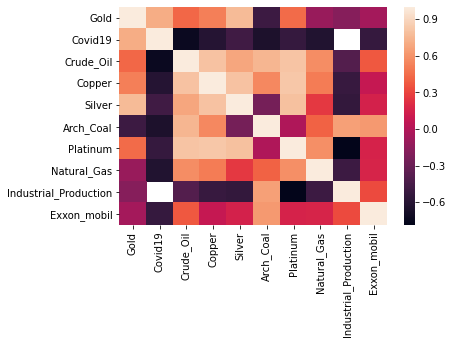

In [66]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df.corr()

# Alaska air group correlations

In [20]:
#Get SQLLite select statement Alaska air group stock prices and indicators
df4 = pd.read_sql_query("""select ag."Date", co."Index" as Crude_Oil, C19."Index" as Covid19, ag."Index" as Alaska_Air_Group
 from Alaska_Air_Group as ag
   LEFT OUTER JOIN Covid19 as C19 ON ag.Date = C19.Date
  LEFT OUTER JOIN crude_oil as co ON ag.Date=co.Date
Where ag."Index" IS NOT NULL
""", conn)
df4.tail()

,Date,Crude_Oil,Covid19,Alaska_Air_Group
2590,2020-04-20 00:00:00,NaN,2355774.0,29.23
2591,2020-04-21 00:00:00,NaN,2433048.0,28.29
2592,2020-04-22 00:00:00,NaN,2520435.0,27.53
2593,2020-04-23 00:00:00,NaN,2588064.0,28.20
2594,2020-04-24 00:00:00,NaN,2668137.0,28.01


,Crude_Oil,Covid19,Alaska_Air_Group
Crude_Oil,1.000000,-0.717002,-0.763589
Covid19,-0.717002,1.000000,-0.680803
Alaska_Air_Group,-0.763589,-0.680803,1.000000


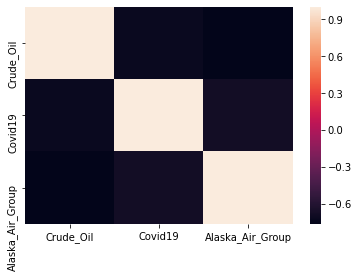

In [29]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df4.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df4.corr()